In [6]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [7]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

## Ecuacion de movmiento

In [8]:
def ec_mov(x_p,t,a=0):
    # x_p representa x , y , px, py
    r3_2 = ( x_p[0]**2 + x_p[1]**2 )**(1.5)
    desv = 1.+a
    dx = x_p[2]*desv
    dy = x_p[3]
    dpx = -(x_p[0]*desv)/r3_2
    dpy = -(x_p[1]*desv)/r3_2
    return array([dx,dy,dpx,dpy])

## Energía y $L_z$

In [9]:

def Energia(x_p,a):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = 0.5*(px*px*(1.+a) + py*py) - ((1.+a)/sqrt(x**2+y**2))
    return E

def L_z(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L = x*py - y*px
    return L

## Orbitas con Runge-Kutta

### Esto es como lo hizo Silvia

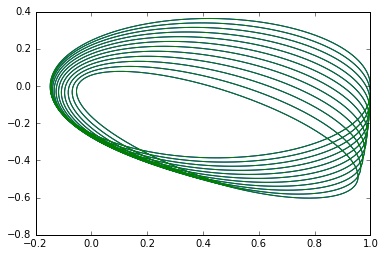

In [12]:
t , sol = rk4(ec_mov, [1,0,0,.5],[0,30],0.05,.001)
plot(sol[:,0], sol[:,1])
t , sol = rk4(ec_mov, [1,0,0,.5],[0,30],0.05,.0001)
plot(sol[:,0], sol[:,1])
show()

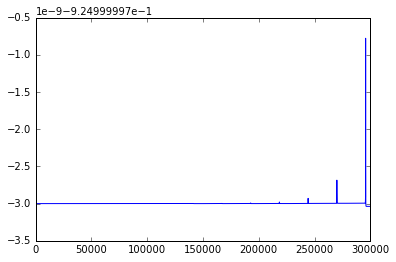

In [13]:
E = Energia(sol,0.05)
plot(E)

### Este como lo hizo Rich

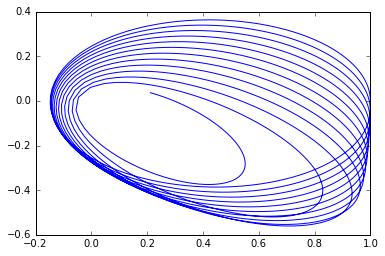

In [14]:
t,sol = rk4(ec_mov,[1,0,0,0.5],[0,30],0.05,0.01)
plot(sol[:,0],sol[:,1])
show()

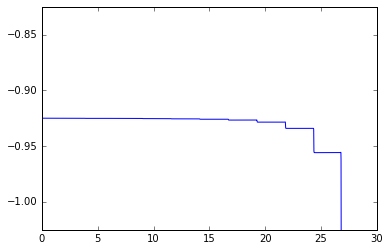

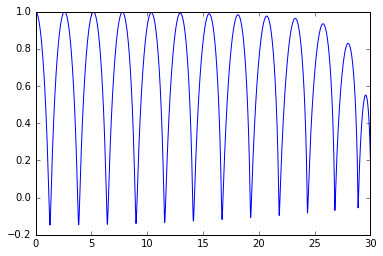

In [16]:
E=Energia(sol,0.05)
ylim([E[0]-.1,E[0]+.1])
plot(t,E)
show()

plot(t,sol[:,0])
show()

## Usando ODE-int

## Como lo hizo Pauina

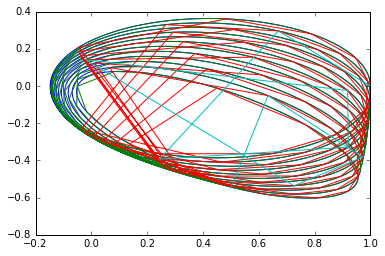

In [17]:

t = linspace(0,30,10000)
sol = odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))
plot(sol[:,0],sol[:,1])
t = linspace(0,30,1000)
sol = odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))
plot(sol[:,0],sol[:,1])
t = linspace(0,30,100)
sol = odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))
plot(sol[:,0],sol[:,1])
t = linspace(0,30,10)
sol = odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))
plot(sol[:,0],sol[:,1])

show()

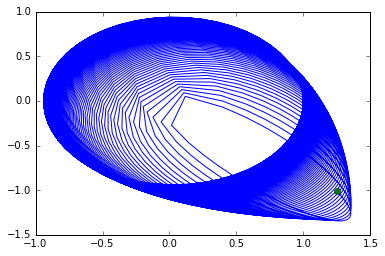

In [18]:

t = linspace(0,2*pi*90,5000)
sol = odeint(ec_mov,[1,0,0,1],t,args=(0.05,))
plot(sol[:,0],sol[:,1])
plot(sol[-1,0],sol[-1,1],'o')
show()

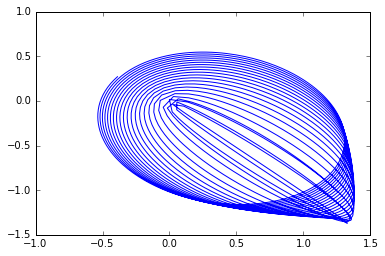

In [19]:

t = linspace(0,2*pi*20,5000)
sol = odeint(ec_mov,sol[-1,:],t,args=(0.05,))
plot(sol[:,0],sol[:,1])
#plot(sol[-1,0],sol[-1,1],'o')
show()

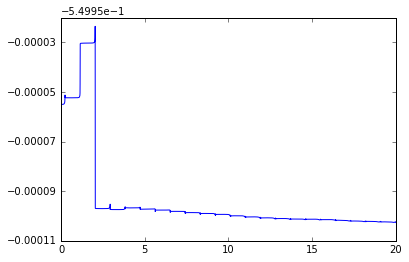

In [20]:
E = Energia(sol,0.05)
#ylim([E[-1]-.1,E[0]+.1])
plot(t/(2*pi),E)
show()

## Como lo hizo Rich

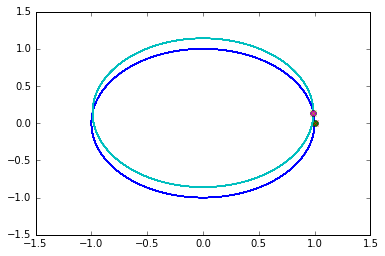

In [21]:

t = linspace(0,2*pi*50,5000)
alfa = 0.0
sol = odeint(ec_mov,[1,0,0,1],t,args=(alfa,),rtol=1e-15)
sol2 = odeint(ec_mov,[0.99,sqrt(1-.99**2),0,1],t,args=(alfa,),rtol=1e-15)
plot(sol[:,0],sol[:,1])
plot(sol[-1,0],sol[-1,1],'o'),plot(sol[0,0],sol[0,1],'x')
plot(sol2[:,0],sol2[:,1])
plot(sol2[-1,0],sol2[-1,1],'o'),plot(sol2[0,0],sol2[0,1],'x')
show()

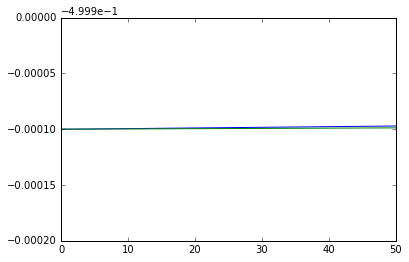

In [22]:

E=Energia(sol,alfa)
E2=Energia(sol2,alfa)
ylim([E[0]-.0001,E[0]+.0001])
plot(t/(2*pi),E)
plot(t/(2*pi),E2)
show()

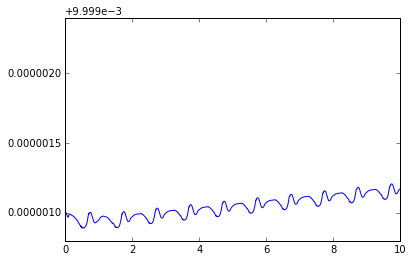

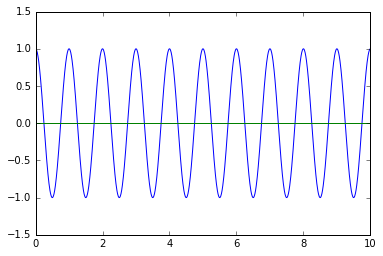

In [24]:
L=L_z(sol)
L2=L_z(sol2)
xlim([0,10])
#ylim([L[0]-.01,L[0]+.01])
#plot(t/(2*pi),L)
#plot(t/(2*pi),L2)
plot(t/(2*pi),L-L2)
show()


xlim([0,10])
plot(t/(2*pi),sol[:,0])
plot(t/(2*pi),50*(L-1))
show()